### Library importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import .csv to dataframe

In [5]:
df = pd.read_csv('responses.csv')

In [26]:
print(df.columns)

Index(['Timestamp', 'Please select your gender:', 'Please enter your age:',
       'Please specify your nationality:',
       'When you think about your childhood, do you recall music being played regularly at home? ',
       'In case music was played at home, it was...',
       'Do you have any experience playing a musical instrument or singing?',
       'In case you do, at what age did you start?',
       'At what age did you stop?',
       'Is someone within your parents or relatives an amateur or professional musician?',
       'Do you generally think of your musical experience as positive or negative?',
       'Do you generally recall your childhood as positive or negative?',
       'Think about your first musical memory, the very first memory which involves music of any kind. What comes to your mind? Take a minute to think about it.',
       'Under which of these categories would you put this memory?',
       'Please describe this memory of lullabies:', 'How old were you?',
     

### Demographic graphs

<AxesSubplot:title={'center':'Age'}, xlabel='ages', ylabel='count'>

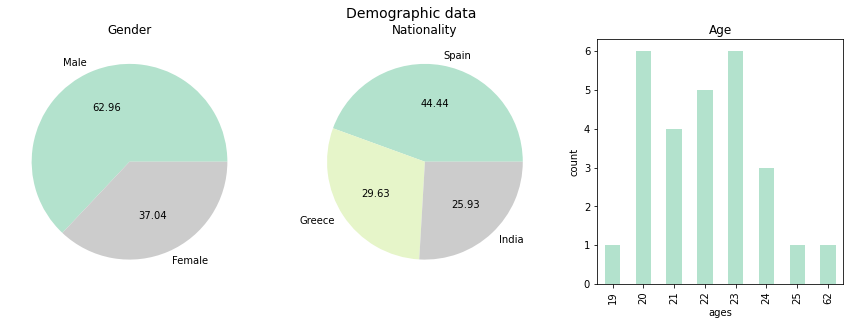

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Demographic data", fontsize=14)
df["Please select your gender:"].value_counts().plot.pie(ax=axes[0], autopct="%.2f", ylabel='', title='Gender', cmap="Pastel2")
df["Please specify your nationality:"].value_counts().plot.pie(ax=axes[1], autopct="%.2f", ylabel='', title='Nationality', cmap="Pastel2")
df["Please enter your age:"].value_counts().sort_index().plot.bar(ax=axes[2], xlabel='ages', ylabel='count', title='Age', cmap="Pastel2")